**Outline**

1. Review Statistical Inference 1
2. Case 1 Spam Email
3. Case 2 Property Rental

In [1]:
%pip install "https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl"
# load data
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 4.6 MB/s eta 0:00:00


## **Topic Review**
---

From the materials that have been learned in the video learning:

**Population and Sample**
  - Population is all objects that have the same characteristic to be used as research targets
  - Sample is part of the population

  **Statistical Inference**
- Statistical inference is about making inference about population from sample data
  - Statistical Test
  - Confidence Interval
- Statistical test need hypothesis, is what we can claim from data.
  - Null hyphotesis ($H_0$): Condition that associate with default action
  - Alternative hyphotesis ($H_1$): Condition that we want to test to do new action
- Test Statistics is a sample statistic that estimates a population of parameters determined by hypotheses
- Significance Level ($\alpha$): a value of probability falsely rejecting $H_0$ (Type I Error)
  - The smaller alpha, the smaller chance of rejecting $H_0$
- Type of test
     - One Sided (Right)
    $$[H_0 : \theta = \theta_0]$$
    $$[H_1 : \theta > \theta_0]$$
     - One sided (Left)
    $$[H_0 : \theta = \theta_0]$$
    $$[H_1 : \theta < \theta_0]$$
     - Two Sided
    $$[H_0 : \theta = \theta_0]$$
    $$[H_1 : \theta \neq \theta_0]$$
      
- Confidence Interval is a range of parameter values is roughly consistent with the data in a sample.

**One sample Proportion**

- Statistics Test
  - Define Null and Alternative Hypothesis
  - Compute one-sample z-test
 $$z = \frac{\hat p- p_0}{\sqrt{\frac{p_0(1-p_0)}{n}}}$$
  - Make Decision based on alpha and type of test
      - Compare statistics test and critical value
          - One-tailed (right), $z > z_{\alpha}$ ; reject $H_0$
          - One-tailed (left), $z < -z_{\alpha}$ ; reject $H_0$
          - Two-tailed, $z > z_{\alpha/2}$ or $ < -z_{\alpha/2}$; reject $H_0$
      - Compare p-value and significance level ($\alpha$)
          - pvalue < $\alpha$ ; reject $H_0$
  
- Confidence Interval of two-sample z-test for proportions. The 100(1-$\alpha$) Confidence interval for two-sample proportion differnce is
$$ \hat{p} \pm z_{\alpha/2}\sqrt{\frac{p_0(1-p_0)}{n}}$$

## **Study Case 1: Spam Email**
___
The company receives a lot of emails and 40% or more of email is spam. The company need to reduce the spam. There are vendor offer the software for reduce spam with licence $1500. The company will buy that software if Software from vendor can decrease the spam to 20%. The Software trial results percentage of the spam decreased to 12% from 100 emails (it means, it left only 12 spams after using the software). Find out whether the company should license the software or not using those data.

<font color="blue">QUESTION!</font>

*What the default action and current condition in the company?*
- [ ] The percentage of spam is more than 20%
- [ ] The percentage of spam is less than 20%
<details>
    <summary><b>Click to show key answer</b></summary>

*What type of test we will perform based on the hypothesis?*
- [ ] One-tailed test (right critical region)
- [x] One-tailed test (left critical region)
- [ ] Two-tailed test

<font color="blue">Explaination</font><br>
Our alternative hypothesis has "$<$" sign, perform one-tailed test with left critical region
</details>

Based on this table, since we use sample poportion to infer proportion of spam after using the software in population, we will perform one-sample z-test

|sample statistics| hypothesis test|
|----|-----|
| $\hat{p}$| one sample z-test|
| $\hat{\mu}$ (unknown $\sigma^2$ or sample size less than 30)| one sample t-test|
| $\hat{\mu}$ (known $\sigma^2$ and sample size exceed than 30)|one sample z-test|

#### 2. Compute z-statistics

$$ z = \frac{\hat{p}-p_{o}}{\sqrt{\frac{p_{o}(1-p_{o})}{n}}} $$

- Use the proportion_ztest() function to calculate z-statistics and p-value for one-sample proportions test

```python
zstats, pval = proportions_ztest(count = ...,
                                 nobs = ...,
                                 value = ...,
                                 alternative = ...)
```
in which
- `count` : number of successes
- `nobs` : number of observations
- `value` : the value of the null hypothesis equal to the proportion in the case of a one sample test.
- `alternative` : It depends on the alternative hypothesis for the test
    - if $H_1$ is not equal to certain value, we use `two-sided`
    - if $H_1$ is larger than certain value, we use `larger`
    - if $H_1$ is smaller than certain value, we use `smaller`

In [2]:
# import proportion_ztest function
from statsmodels.stats.proportion import proportions_ztest

# perform one-sample proportion z-test
z_stat, p_value = proportions_ztest(count = 12, nobs = 100, value=0.2, alternative='smaller')

print(f"z stats : {z_stat:.4f}")
print(f"p-value : {p_value:.4f}")

z stats : -2.4618
p-value : 0.0069


- The next step we will find critical value to compare with z statistic test. We use 5% significance level (alpha)

In [3]:
# critical value in our case is z-value where the left-tailed area under a standard normal distribution is 0.05 (alpha)

import scipy.stats as stats
z_crit = stats.norm.ppf(0.05)
print(z_crit)

-1.6448536269514729


- Make decision rule

In [4]:
# Decision rule based on p-value

if p_value<0.05:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")

Reject the null hypothesis


In [5]:
# Decision rule based on critical value

if z_stat<z_crit:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")

Reject the null hypothesis


- Visualize the critical region

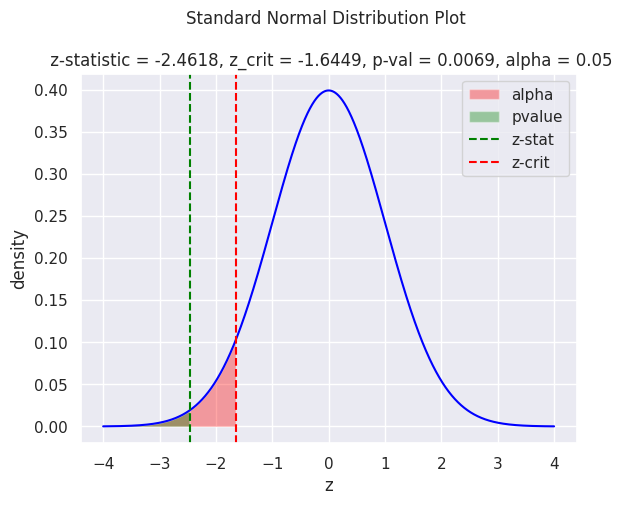

In [10]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats  # Don't forget to import stats

# Set Seaborn's theme
sns.set_theme()

# Plot sample distribution
x = np.arange(-4, 4, 0.001)
plt.plot(x, stats.norm.pdf(x, 0, 1), color='blue')

# Plot alpha region
x_alpha = np.arange(-4, z_crit, 0.01)
y_alpha = stats.norm.pdf(x_alpha)
plt.fill_between(x=x_alpha, y1=y_alpha, facecolor='red', alpha=0.35, label='alpha')

# Plot pvalue
x_pvalue = np.arange(-4, z_stat, 0.01)
y_pvalue = stats.norm.pdf(x_pvalue)
plt.fill_between(x=x_pvalue, y1=y_pvalue, facecolor='green', alpha=0.35, label='pvalue')

# Plot z-crit and z-stats
plt.axvline(np.round(z_stat, 4), color="green", linestyle="--", label="z-stat")
plt.axvline(z_crit, color="red", linestyle="--", label="z-crit")

plt.legend()
plt.xlabel("z")
plt.ylabel("density")
plt.title(f'Standard Normal Distribution Plot \n\n z-statistic = {np.round(z_stat, 4)}, z_crit = {np.round(z_crit, 4)}, p-val = {np.round(p_value, 4)}, alpha = 0.05')

plt.show()


After that, we will compute confidence interval to estimate our true proportion in population lies within specific range with certain % confidence level. We will use function `proportion_confint`. The will use 95% confidence level

- Use the proportion_confint() function to calculate lower and upper confidence interval


```python
ci_low, ci_upp = proportion_confint(count = ...,
                                    nobs = ...,
                                    alpha = ...)
```

in which
- `count` : number of successes
- `nobs` : number of observations
- `alpha` : significance level

In [11]:
import statsmodels.api as sm

#Function for computing confidence intervals
from statsmodels.stats.proportion import proportion_confint

ci_low, ci_upp = proportion_confint(count=12, nobs=100, alpha=(1-0.95))

print(f"proportion in population lies between {ci_low:.4f} and {ci_upp:.4f}")

proportion in population lies between 0.0563 and 0.1837


####  Conclusion

- p-value less than significance level (0,05) we can reject null Hyphotesis $(H_0)$.
- Therefore, from the data, we can **reject** if the percentage of spam has decreased to **more than or equal** 20%

- We are 95% confidence that percentage of spam decreased to in range 5.63% to 18.37% after using the licensed software.

Recommendation for business:
- Manager should consider to licence the software.

## **Study Case 2: Property Rental**
___
Consider the decisions faced by companies managing the rental of the property. The rents of the properties it manages proportional to its earning. The company is considering growing into an expensive area of downtown San Francisco. The company requires rents in this area to average more than $1500 per month in order to cover its costs.

The company collected 115 rental unit in San Francisco area. From the data are San Francisco rents high enough to support the expansion? Managers at the company decided on a 1% possibility for a Type I error due to the cost of entering a new market (an unprofitable expansion).

#### 1. Define Hyphoteses

Null hypothesis state the default action that the expansion into the rental market in San Francisco will not be profitable. We need collect sample as the data to prove otherwise.

$$ H_0: \mu \leq 1500$$
$$ H_1: \mu > 1500 $$

where $\mu$ is the meand of monthly rent price

#### Load Data

In [13]:
rent = pd.read_csv("rent.csv")

#### Visualize the distribution of data

Mean of monthly rent in samples = $1724.45
Standard deviation of monthly rent in samples = $623.29


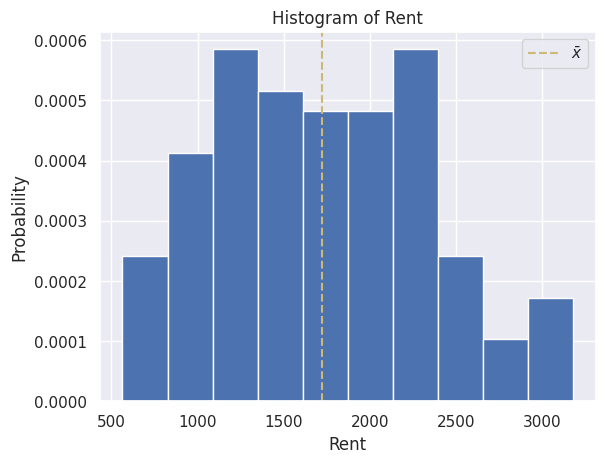

In [14]:
plt.hist(rent["monthly rent"], density = True)

mean_rent = np.mean(rent["monthly rent"])
std_rent = np.std(rent["monthly rent"])

print(f"Mean of monthly rent in samples = ${np.round(mean_rent,2)}")
print(f"Standard deviation of monthly rent in samples = ${np.round(std_rent,2)}")

plt.axvline(mean_rent, color ="y", linestyle = "--", label = r"$\bar{x}$")
plt.xlabel('Rent')
plt.ylabel('Probability')
plt.title('Histogram of Rent')
plt.legend()
plt.show()

- From the histogram, many units rent for less than `$1500` in San Francisco. Does this mean $H_0$ is true?
- The company is interested in the average rent even though many individual homes rent for less than `$1500`.
- Histogram shows rents for individual properties. That scale shouldn't be used to determine how far $\bar{x}$ is from $\mu$.

Based on this table, since we use sample mean to infer population mean of monthly rent, and although we have large samples (more than 30 observations), we don't know about the population standard deviation ($\sigma$), so we use t-test instead of z-test

|sample statistics| hypothesis test|statistics test|
|----|-----|---|
| $\hat{p}$| one sample z-test|$\frac{\hat{p}-p_{o}}{\sqrt{\frac{p_{o}(1-p_{o})}{n}}}$|
| $\hat{\mu}$ (unknown $\sigma^2$ or n $\leq$ 30)| one sample t-test|$\frac{(\bar x - \mu_0)}{\frac{s}{\sqrt(n)}}$|
| $\hat{\mu}$ (known $\sigma^2$ and n > 30)|one sample z-test|$\frac{(\bar x - \mu_0)}{\frac{\sigma}{\sqrt(n)}}$|

#### 2. Compute t-statistics

$$ t = \frac{\bar{x}-\mu_0}{\sqrt{s^2/n}}$$

- t-value tells us about how far the deviation sample mean $\bar{x}$ and population mean $\mu$ under assumption $H_0$ is true.
- We will use the ttest_1samp() function to calculate t-statistics and p-value for one-sample mean test

```python
zstats, pval = ttest_1samp(a = ...,
                           popmean = ...,
                           alternative = ...)
```
in which
- `a` : number of successes
- `popmean` : expected value of mean in null hypothesis.
- `alternative` : It depends on the alternative hypothesis for the test
    - if $H_1$ is not equal to certain value, we use `two-sided`
    - if $H_1$ is larger than certain value, we use `greater`
    - if $H_1$ is smaller than certain value, we use `less`

In [15]:
from scipy.stats import ttest_1samp

t_statistics, p_value = ttest_1samp(a = rent["monthly rent"], popmean=1500, alternative='greater')
print(f"t stats : {t_statistics:.4f}")
print(f"p-value : {p_value:.4f}")

t stats : 3.7767
p-value : 0.0001


- The next step we will find critical value to compare with t statistic test. We use 1% significance level (alpha)

In [16]:
# critical value in our case is t-value where the right-tailed area under a standard normal distribution is 0.01 (alpha)
# set df as sample size minus 1, df is degree of freedom as parameter to compute t-value under t-distribution

import scipy.stats as stats
t_crit = stats.t.ppf(1-0.01, df = 114)
print(t_crit)

2.359503735825506


- Make decision rule

In [17]:
# Decision rule based on p-value and alpha

if p_value<0.01:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")

Reject the null hypothesis


In [18]:
# Decision rule based on critical value

if t_statistics>t_crit:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")

Reject the null hypothesis


- Visualize the critical region

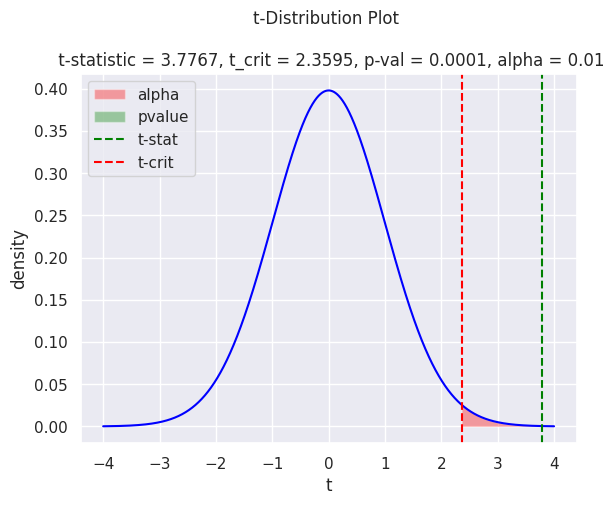

In [21]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set Seaborn theme for styling
sns.set_theme()

# plot sample distribution
x = np.arange(-4, 4, 0.001)
plt.plot(x, stats.t.pdf(x, df=114), color='blue')

# plot alpha region
x_alpha = np.arange(t_crit, 4, 0.01)
y_alpha = stats.t.pdf(x_alpha, df=114)
plt.fill_between(x=x_alpha, y1=y_alpha, facecolor='red', alpha=0.35, label='alpha')

# plot pvalue
x_pvalue = np.arange(t_statistics, 4, 0.01)
y_pvalue = stats.t.pdf(x_pvalue, df=114)
plt.fill_between(x=x_pvalue, y1=y_pvalue, facecolor='green', alpha=0.35, label='pvalue')

# plot t-crit and t-stats
plt.axvline(np.round(t_statistics, 4), color="green", linestyle="--", label="t-stat")
plt.axvline(t_crit, color="red", linestyle="--", label="t-crit")

plt.legend()
plt.xlabel("t")
plt.ylabel("density")
plt.title(f't-Distribution Plot \n\n t-statistic = {np.round(t_statistics, 4)}, t_crit = {np.round(t_crit, 4)}, p-val = {np.round(p_value, 4)}, alpha = 0.01')

plt.show()


After that, we will compute confidence interval to estimate our true mean in population lies within specific range with certain % confidence level. We will use function `proportion_confint`. The will use 95% confidence level

- Use the proportion_confint() function to calculate lower and upper confidence interval


```python
ci_low, ci_upp = proportion_confint(count = ...,
                                    nobs = ...,
                                    alpha = ...)
```

in which
- `count` : number of successes
- `nobs` : number of observations
- `alpha` : significance level



In [22]:
import pandas as pd
import numpy as np
from statsmodels.stats.weightstats import _tconfint_generic

ci_low, ci_upp = _tconfint_generic(mean = mean_rent,
                                   std_mean = std_rent,
                                   dof = 114, alpha=0.01,
                                   alternative='two-sided')

print(f"Monthly rent in San Fransisco area lies between ${ci_low:.2f} and ${ci_upp:.2f}")

Monthly rent in San Fransisco area lies between $91.65 and $3357.24


- But what happen with `$1500` that lies inside this interval?
  - Even though `$1500` lies inside the confidence interval, the test rejects $H_0$ because the p-value less than alpha
- It’s a drawback of using a confidence interval. It is less sensitive than using the one-sided test when setting a lower limit for the average rent $\mu$.
- To put it another way, in this case, the one-sided test is more powerful than the confidence interval.
- However, that the one-sided test only rejects $H_0$ without indicating the possible of monthly rent

####  Conclusion

- p-value less than significance level (0,05) we can reject null Hyphotesis $(H_0)$.
- Therefore, from the data, we can **reject** claim that monthly rent is San Fransisco is **less than or equal** $1500

- We are 99% confidence that monthly rent is San Fransisco lies between `$91.65` and `$3357.24`

Recommendation for business:
- The company should consider to expanse rent property in downtown San Francisco.